Raw data saved to C:\Users\Gebruiker\Desktop\My Lab\Wildfire-Assessment\Analysis\risk_reduction_gender.xlsx
Visualization saved to C:\Users\Gebruiker\Desktop\My Lab\Wildfire-Assessment\Analysis\risk_reduction_gender.png


<Figure size 1000x600 with 0 Axes>

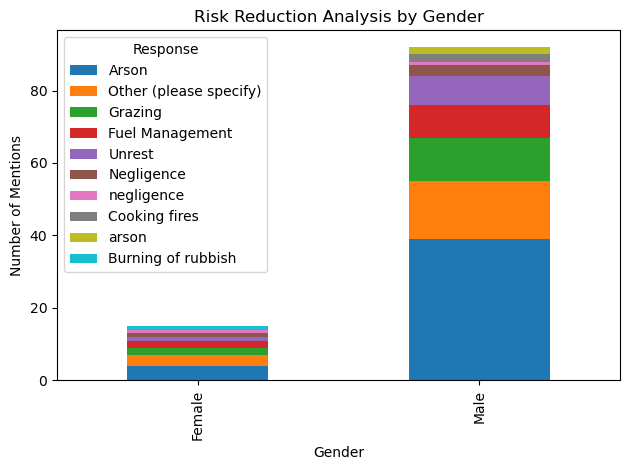

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def analyze_and_visualize(data_path, output_path, category, analysis_type, top_n=5, save_excel=False, output_file='output.xlsx', image_file='output.png'):
    """
    Analyzes the data based on the specified category and type of analysis, then visualizes the results.
    
    Parameters:
    - data_path (str): Path to the input Excel file containing the survey data.
    - output_path (str): Directory where output Excel and images should be saved.
    - category (str): The category to filter by (e.g., 'Review and Analysis', 'Risk Reduction').
    - analysis_type (str): The type of analysis ('Province', 'Gender', or any column of interest).
    - top_n (int): The number of top responses to display in the visualization (default: 5).
    - save_excel (bool): Whether to save the raw data of the analysis to an Excel file (default: False).
    - output_file (str): The name of the output Excel file (default: 'output.xlsx').
    - image_file (str): The name of the image file for saving the visualization (default: 'output.png').
    
    Returns:
    - A visualization (heatmap or bar chart) based on the input parameters.
    """

    # Load the data
    dataframe = pd.read_excel(data_path)

    # Filter the dataframe based on the selected category
    filtered_df = dataframe[dataframe['Category'] == category]

    # Group by the chosen analysis type and count occurrences of responses
    grouped_df = filtered_df.groupby([analysis_type, 'Response']).size().unstack(fill_value=0)

    # Calculate the total number of mentions across all groups and select the top N
    top_responses = grouped_df.sum(axis=0).nlargest(top_n).index
    top_responses_df = grouped_df[top_responses]

    # Save the raw data to an Excel file if requested
    if save_excel:
        output_excel_path = os.path.join(output_path, output_file)
        top_responses_df.to_excel(output_excel_path)
        print(f"Raw data saved to {output_excel_path}")

    # Visualization
    plt.figure(figsize=(10, 6))
    if analysis_type == 'Province':
        # Heatmap for province-based analysis
        sns.heatmap(top_responses_df, annot=True, cmap="YlGnBu", linewidths=.5)
        plt.title(f'{category} Analysis by {analysis_type}')
        plt.xlabel('Response')
        plt.ylabel(analysis_type)
    else:
        # Bar chart for other types of analysis (e.g., Gender)
        top_responses_df.plot(kind='bar', stacked=True)
        plt.title(f'{category} Analysis by {analysis_type}')
        plt.xlabel(analysis_type)
        plt.ylabel('Number of Mentions')

    plt.tight_layout()

    # Save the plot as an image
    output_image_path = os.path.join(output_path, image_file)
    plt.savefig(output_image_path)
    print(f"Visualization saved to {output_image_path}")

    # Show the plot
    plt.show()

# Example usage
data_path = r'C:\Users\Gebruiker\Desktop\My Lab\Wildfire-Assessment\Processeddata\4_Updated_Merged_Categorized_South_Africa_Wildland_Fire_Survey2.xlsx'
output_path = r'C:\Users\Gebruiker\Desktop\My Lab\Wildfire-Assessment\Analysis'

# Example: Risk Reduction by Gender with top 10 responses
analyze_and_visualize(data_path, output_path, category='Risk Reduction', analysis_type='Gender', top_n=10, save_excel=True, output_file='risk_reduction_gender.xlsx', image_file='risk_reduction_gender.png')


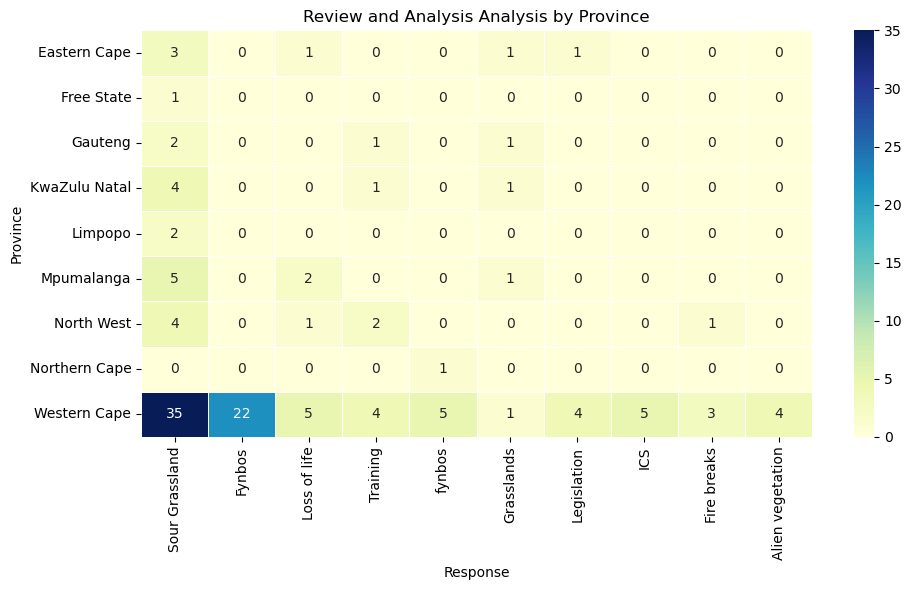

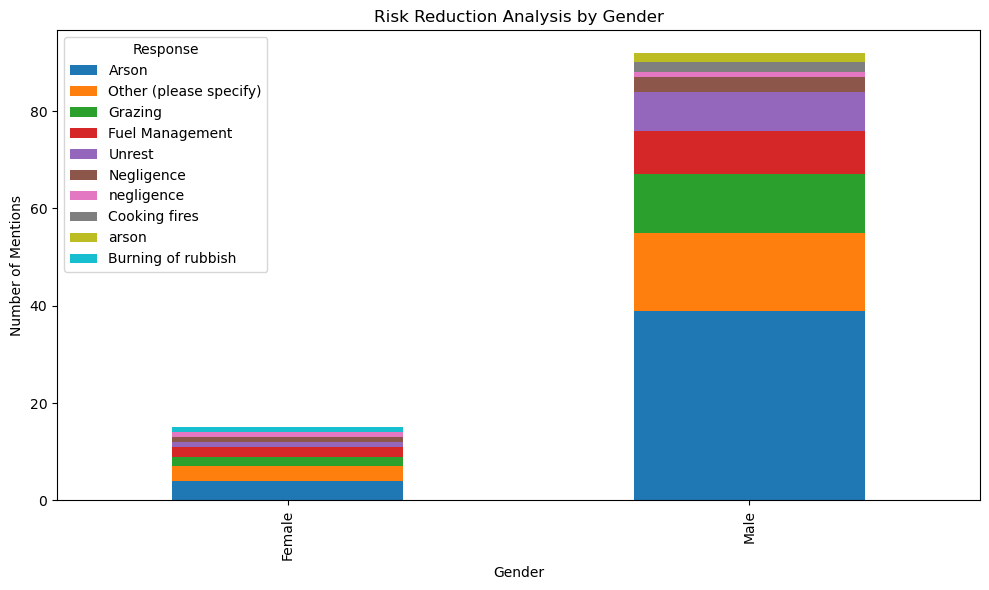

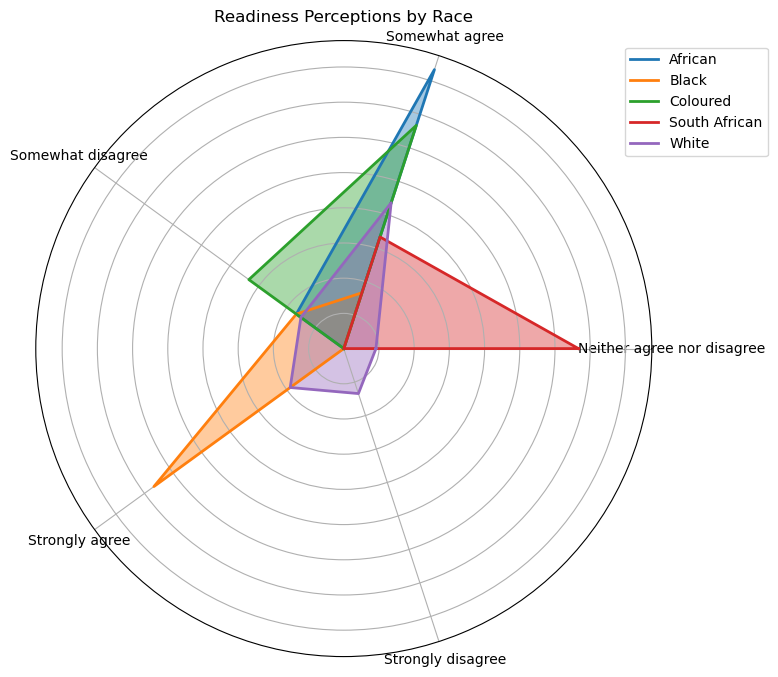

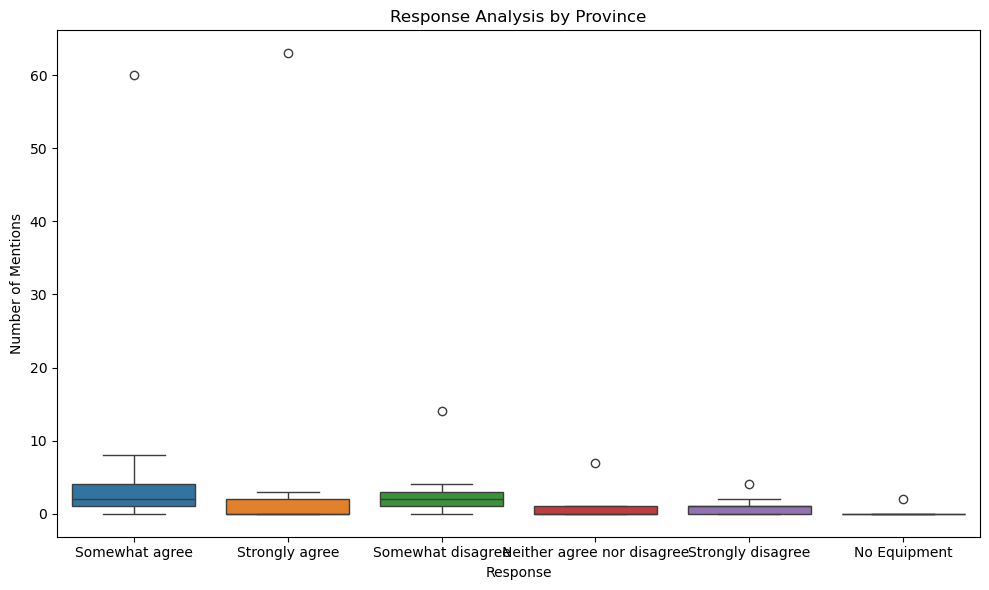

<Figure size 1000x600 with 0 Axes>

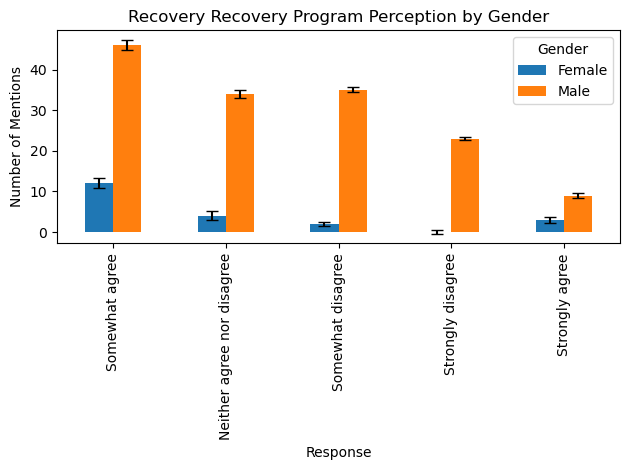

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

def analyze_and_visualize_all(data_path, output_path):
    """
    Analyzes different categories (Review, Risk Reduction, Readiness, Response, Recovery) and creates
    distinct visualizations for each. Saves corresponding Excel and images.
    """

    # Load the data
    dataframe = pd.read_excel(data_path)

    # ----------- Review and Analysis (Heatmap) ---------------- #
    category = 'Review and Analysis'
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Province', 'Response']).size().unstack(fill_value=0)

    top_responses = grouped_df.sum(axis=0).nlargest(10).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'review_analysis_province.xlsx'))

    # Heatmap visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(top_responses_df, annot=True, cmap="YlGnBu", linewidths=.5)
    plt.title(f'{category} Analysis by Province')
    plt.xlabel('Response')
    plt.ylabel('Province')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'review_analysis_province.png'))
    plt.show()

    # ----------- Risk Reduction (Stacked Bar Chart) ---------------- #
    category = 'Risk Reduction'
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Gender', 'Response']).size().unstack(fill_value=0)

    top_responses = grouped_df.sum(axis=0).nlargest(10).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'risk_reduction_gender.xlsx'))

    # Stacked bar chart visualization
    top_responses_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'{category} Analysis by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Mentions')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'risk_reduction_gender.png'))
    plt.show()

    # ----------- Readiness (Radar Chart) ---------------- #
    from math import pi

    category = 'Readiness'
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Race', 'Response']).size().unstack(fill_value=0)

    # Normalize the values to plot on radar
    radar_data = grouped_df.div(grouped_df.sum(axis=1), axis=0)
    labels = radar_data.columns
    races = radar_data.index

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i, race in enumerate(races):
        values = radar_data.loc[race].values.flatten().tolist()
        values += values[:1]  # complete the circle
        angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
        angles += angles[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=race)
        ax.fill(angles, values, alpha=0.4)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels([])  # hide radial labels
    ax.set_title('Readiness Perceptions by Race')
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.savefig(os.path.join(output_path, 'readiness_race_radar.png'))
    plt.show()

    # Save raw data to Excel
    grouped_df.to_excel(os.path.join(output_path, 'readiness_race.xlsx'))

    # ----------- Response (Box Plot) ---------------- #
    category = 'Response'
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Province', 'Response']).size().unstack(fill_value=0)

    top_responses = grouped_df.sum(axis=0).nlargest(10).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'response_province.xlsx'))

    # Box plot visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=top_responses_df)
    plt.title(f'{category} Analysis by Province')
    plt.ylabel('Number of Mentions')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'response_province_boxplot.png'))
    plt.show()

    # ----------- Recovery (Grouped Bar Chart with Error Bars) ---------------- #
    category = 'Recovery'
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Gender', 'Response']).size().unstack(fill_value=0)

    top_responses = grouped_df.sum(axis=0).nlargest(10).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'recovery_gender.xlsx'))

    # Grouped bar chart with error bars
    plt.figure(figsize=(10, 6))
    top_responses_df.T.plot(kind='bar', yerr=np.random.rand(len(top_responses_df.T)) * 2, capsize=4)
    plt.title(f'{category} Recovery Program Perception by Gender')
    plt.ylabel('Number of Mentions')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'recovery_gender_barchart.png'))
    plt.show()

# Example usage
data_path = r'C:\Users\Gebruiker\Desktop\My Lab\Wildfire-Assessment\Processeddata\4_Updated_Merged_Categorized_South_Africa_Wildland_Fire_Survey2.xlsx'
output_path = r'C:\Users\Gebruiker\Desktop\My Lab\Wildfire-Assessment\Analysis'

# Run the full analysis with distinct visualizations
analyze_and_visualize_all(data_path, output_path)


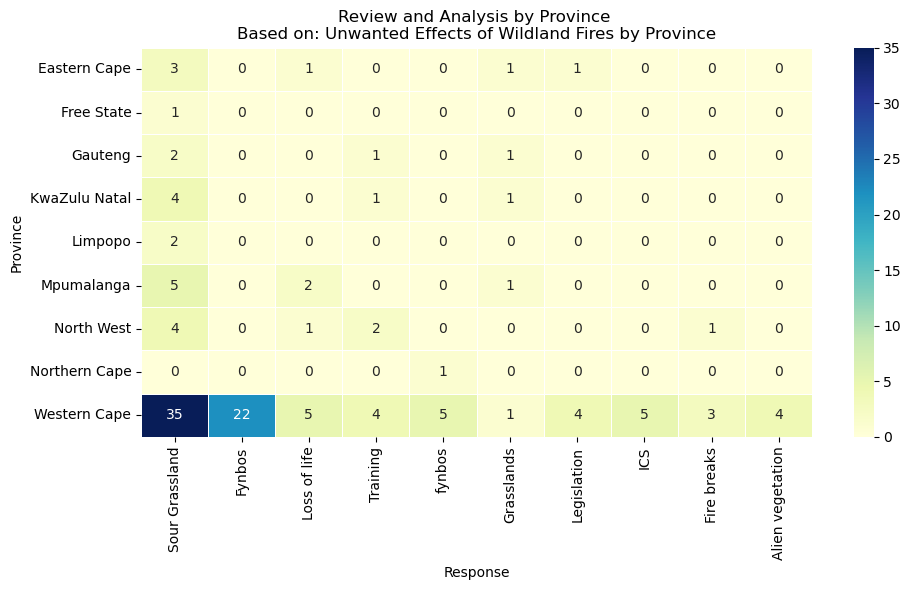

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def review_analysis_heatmap(data_path, output_path, top_n=10):
    category = 'Review and Analysis'
    dataframe = pd.read_excel(data_path)
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Province', 'Response']).size().unstack(fill_value=0)

    top_responses = grouped_df.sum(axis=0).nlargest(top_n).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'review_analysis_province.xlsx'))

    # Heatmap visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(top_responses_df, annot=True, cmap="YlGnBu", linewidths=.5)
    plt.title(f'{category} by Province \nBased on: Unwanted Effects of Wildland Fires by Province')
    plt.xlabel('Response')
    plt.ylabel('Province')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'review_analysis_province.png'))
    plt.show()

# Example usage
review_analysis_heatmap(data_path, output_path, top_n=10)


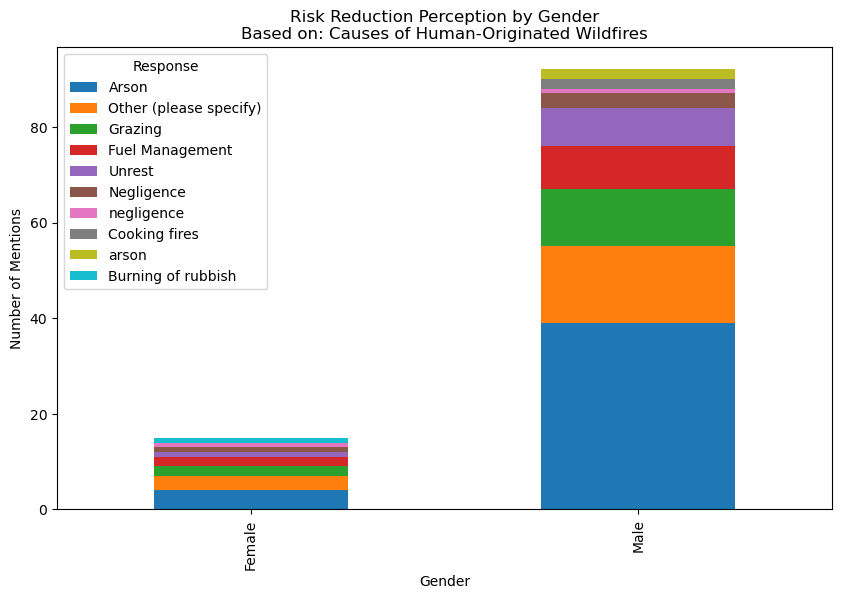

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def risk_reduction_stacked_bar(data_path, output_path, top_n=10):
    category = 'Risk Reduction'
    dataframe = pd.read_excel(data_path)
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Gender', 'Response']).size().unstack(fill_value=0)

    top_responses = grouped_df.sum(axis=0).nlargest(top_n).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'risk_reduction_gender.xlsx'))

    # Stacked bar chart visualization
    top_responses_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Risk Reduction Perception by Gender\nBased on: Causes of Human-Originated Wildfires')
    plt.xlabel('Gender')
    plt.ylabel('Number of Mentions')

# Example usage
risk_reduction_stacked_bar(data_path, output_path, top_n=10)


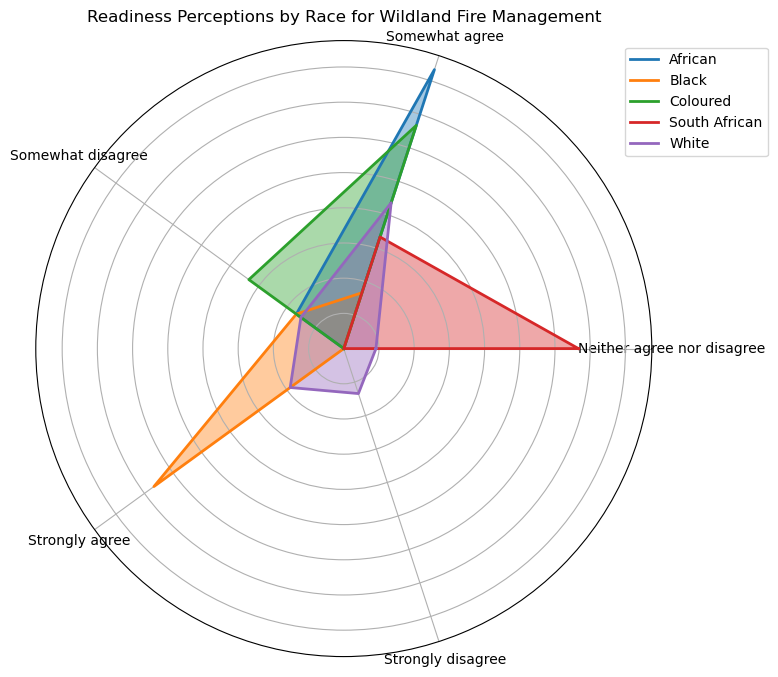

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import os

def readiness_radar_chart(data_path, output_path):
    category = 'Readiness'
    dataframe = pd.read_excel(data_path)
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Race', 'Response']).size().unstack(fill_value=0)

    # Normalize the values to plot on radar
    radar_data = grouped_df.div(grouped_df.sum(axis=1), axis=0)
    labels = radar_data.columns
    races = radar_data.index

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i, race in enumerate(races):
        values = radar_data.loc[race].values.flatten().tolist()
        values += values[:1]  # complete the circle
        angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
        angles += angles[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=race)
        ax.fill(angles, values, alpha=0.4)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels([])  # hide radial labels
    ax.set_title('Readiness Perceptions by Race for Wildland Fire Management')
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.savefig(os.path.join(output_path, 'readiness_race_radar.png'))
    plt.show()

    # Save raw data to Excel
    grouped_df.to_excel(os.path.join(output_path, 'readiness_race.xlsx'))

# Example usage
readiness_radar_chart(data_path, output_path)


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_31676\84539993.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


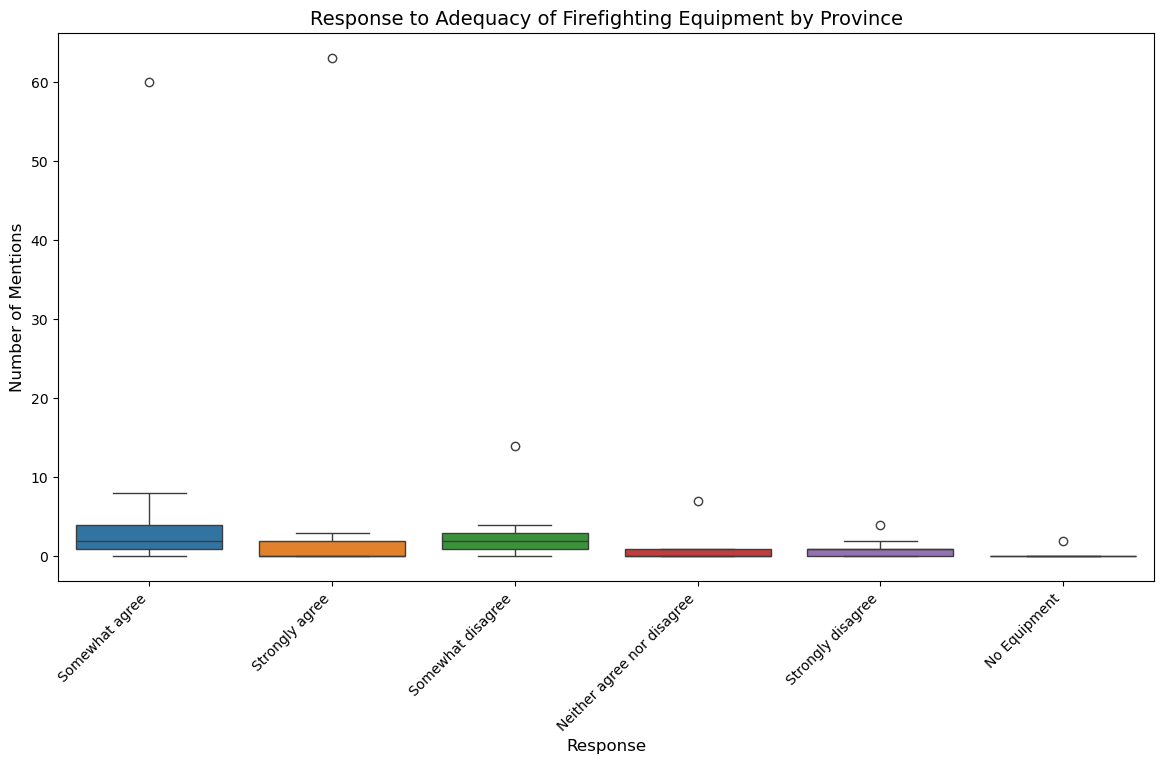

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def response_box_plot(data_path, output_path, top_n=40):
    category = 'Response'
    dataframe = pd.read_excel(data_path)
    
    # Filter by the 'Response' category and group by province and response
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Province', 'Response']).size().unstack(fill_value=0)

    # Get the top N responses
    top_responses = grouped_df.sum(axis=0).nlargest(top_n).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'response_province.xlsx'))

    # Box plot visualization with improved label alignment
    plt.figure(figsize=(12, 8))  # Increased figure size for better label spacing
    ax = sns.boxplot(data=top_responses_df)

    # Adjusting the title and labels
    plt.title(f'{category} to Adequacy of Firefighting Equipment by Province', fontsize=14)
    plt.ylabel('Number of Mentions', fontsize=12)
    plt.xlabel('Response', fontsize=12)

    # Rotate the x-axis labels for better alignment
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add some padding to make the layout more spacious
    plt.tight_layout(pad=2)

    # Save the improved visualization
    plt.savefig(os.path.join(output_path, 'response_province_boxplot.png'))
    plt.show()

# Example usage
data_path = 'C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Processeddata/4_Updated_Merged_Categorized_South_Africa_Wildland_Fire_Survey2.xlsx'
output_path = 'C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Analysis'

response_box_plot(data_path, output_path, top_n=40)


<Figure size 1000x600 with 0 Axes>

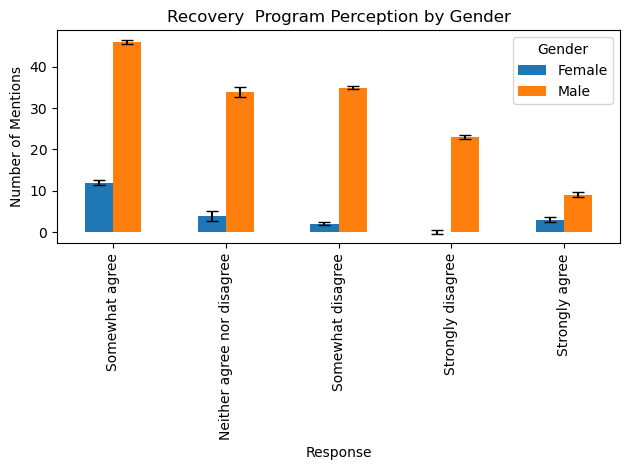

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def recovery_grouped_bar_chart(data_path, output_path, top_n=10):
    category = 'Recovery'
    dataframe = pd.read_excel(data_path)
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Gender', 'Response']).size().unstack(fill_value=0)

    top_responses = grouped_df.sum(axis=0).nlargest(top_n).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'recovery_gender.xlsx'))

    # Grouped bar chart with error bars
    plt.figure(figsize=(10, 6))
    top_responses_df.T.plot(kind='bar', yerr=np.random.rand(len(top_responses_df.T)) * 2, capsize=4)
    plt.title(f'{category}  Program Perception by Gender')
    plt.ylabel('Number of Mentions')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'recovery_gender_barchart.png'))
    plt.show()

# Example usage
recovery_grouped_bar_chart(data_path, output_path, top_n=10)


With subtitles examples

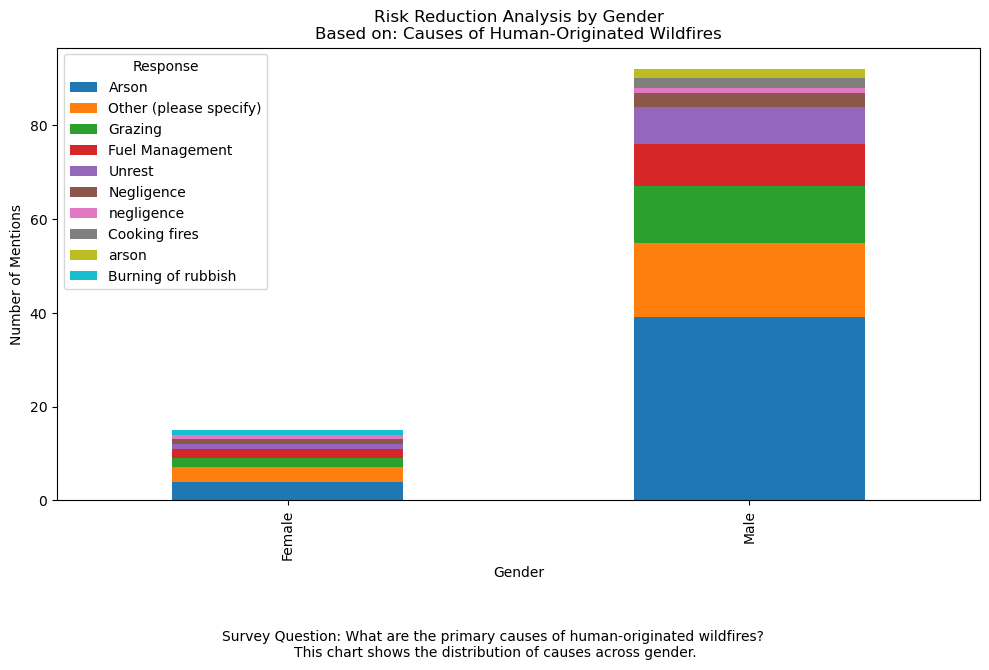

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def risk_reduction_stacked_bar_with_context(data_path, output_path, top_n=10):
    category = 'Risk Reduction'
    dataframe = pd.read_excel(data_path)
    filtered_df = dataframe[dataframe['Category'] == category]
    grouped_df = filtered_df.groupby(['Gender', 'Response']).size().unstack(fill_value=0)

    top_responses = grouped_df.sum(axis=0).nlargest(top_n).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, 'risk_reduction_gender.xlsx'))

    # Stacked bar chart visualization
    top_responses_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Risk Reduction Analysis by Gender\nBased on: Causes of Human-Originated Wildfires')
    plt.xlabel('Gender')
    plt.ylabel('Number of Mentions')

    # Add context below the chart
    plt.figtext(0.5, -0.1, "Survey Question: What are the primary causes of human-originated wildfires? \nThis chart shows the distribution of causes across gender.", 
                wrap=True, horizontalalignment='center', fontsize=10)

    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'risk_reduction_gender_context.png'))
    plt.show()

# Example usage
risk_reduction_stacked_bar_with_context(data_path, output_path, top_n=10)


Specific question

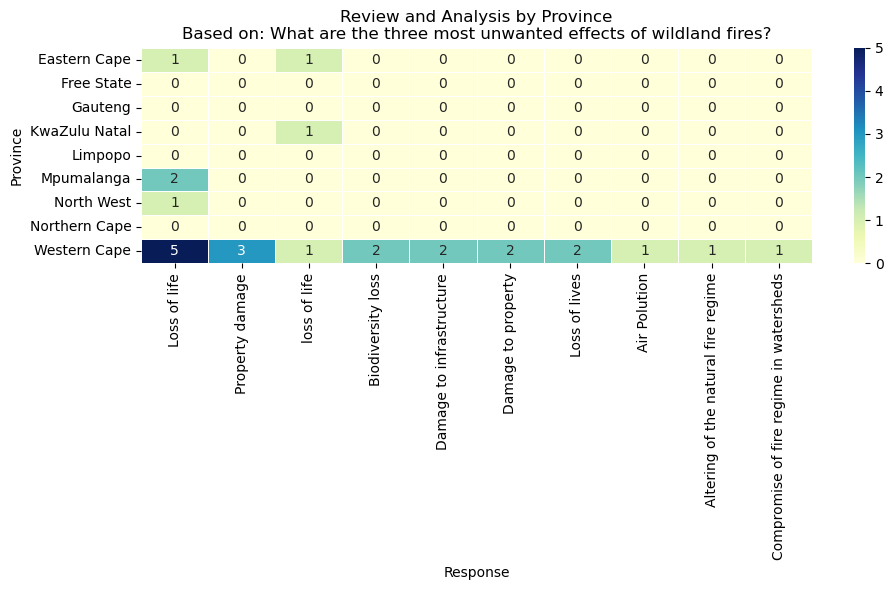

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def review_analysis_heatmap_specific_question(data_path, output_path, question_text, top_n=10):
    """
    Analyzes and visualizes specific question responses from the "Review and Analysis" category.
    
    Parameters:
    - data_path: Path to the Excel file.
    - output_path: Directory to save the output files.
    - question_text: The specific question to filter (e.g., "What are the three most unwanted effects of wildland fires?").
    - top_n: The number of top responses to display.
    """
    category = 'Review and Analysis'
    dataframe = pd.read_excel(data_path)

    # Filter the dataframe based on the specific question
    filtered_df = dataframe[(dataframe['Category'] == category) & (dataframe['Question'].str.contains(question_text, case=False, na=False))]

    # Group by province and response
    grouped_df = filtered_df.groupby(['Province', 'Response']).size().unstack(fill_value=0)

    # Get top N responses
    top_responses = grouped_df.sum(axis=0).nlargest(top_n).index
    top_responses_df = grouped_df[top_responses]

    # Save raw data to Excel
    top_responses_df.to_excel(os.path.join(output_path, f'review_analysis_{question_text[:20]}.xlsx'))

    # Heatmap visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(top_responses_df, annot=True, cmap="YlGnBu", linewidths=.5)
    plt.title(f'Review and Analysis by Province\nBased on: {question_text[:90]}')
    plt.xlabel('Response')
    plt.ylabel('Province')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f'review_analysis_{question_text[:20]}.png'))
    plt.show()

# Example usage
question_text = "What are the three most unwanted effects of wildland fires?"
review_analysis_heatmap_specific_question(data_path, output_path, question_text, top_n=10)


Raw data saved to C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Analysis\risk_reduction_gender.xlsx
Visualization saved to C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Analysis\risk_reduction_gender_context.png


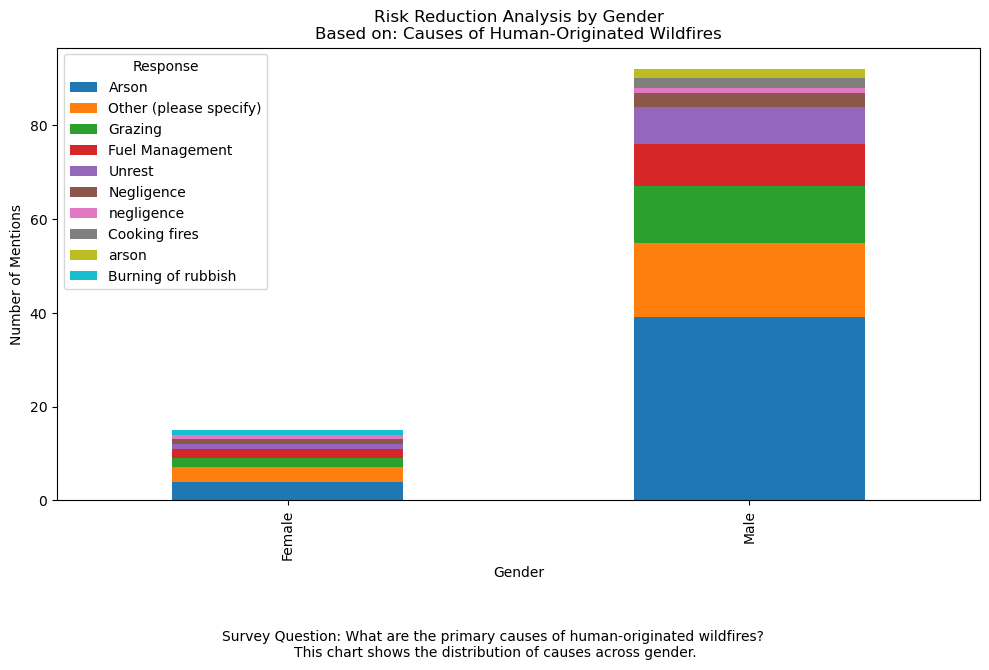

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def risk_reduction_stacked_bar_with_context(data_path, output_path, top_n=10):
    # Load the data from the Excel file
    category = 'Risk Reduction'
    dataframe = pd.read_excel(data_path)
    
    # Filter by category and group by gender and response, then count occurrences
    filtered_df = dataframe[dataframe['Category'] == category]
    
    # Ensure we are only working with responses that have valid data
    if filtered_df.empty:
        print("No data found for the category.")
        return

    # Group by Gender and Response, count occurrences
    grouped_df = filtered_df.groupby(['Gender', 'Response']).size().unstack(fill_value=0)
    
    # Ensure only the top_n responses are visualized
    top_responses = grouped_df.sum(axis=0).nlargest(top_n).index
    top_responses_df = grouped_df[top_responses]

    # Check if top_responses_df has any valid data
    if top_responses_df.empty:
        print("No data to plot for the selected top N responses.")
        return

    # Save raw data to Excel
    output_excel_path = os.path.join(output_path, 'risk_reduction_gender.xlsx')
    top_responses_df.to_excel(output_excel_path)
    print(f"Raw data saved to {output_excel_path}")

    # Check for numeric data before plotting
    if not pd.api.types.is_numeric_dtype(top_responses_df.values):
        print("Data is not numeric and cannot be plotted.")
        return

    # Stacked bar chart visualization
    ax = top_responses_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Risk Reduction Analysis by Gender\nBased on: Causes of Human-Originated Wildfires')
    plt.xlabel('Gender')
    plt.ylabel('Number of Mentions')

    # Add context below the chart
    plt.figtext(0.5, -0.1, "Survey Question: What are the primary causes of human-originated wildfires? \nThis chart shows the distribution of causes across gender.", 
                wrap=True, horizontalalignment='center', fontsize=10)

    # Save and show the plot
    output_image_path = os.path.join(output_path, 'risk_reduction_gender_context.png')
    plt.tight_layout()
    plt.savefig(output_image_path)
    print(f"Visualization saved to {output_image_path}")
    plt.show()

# Example usage
data_path = 'C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Processeddata/4_Updated_Merged_Categorized_South_Africa_Wildland_Fire_Survey2.xlsx'
output_path = 'C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Analysis'

risk_reduction_stacked_bar_with_context(data_path, output_path, top_n=10)


Stats

In [33]:
import pandas as pd

def descriptive_statistics(data_path):
    dataframe = pd.read_excel(data_path)

    # Example: Get descriptive statistics for responses in the 'Response' category
    descriptive_stats = dataframe.groupby(['Category', 'Response']).size().describe()

    print("Descriptive Statistics for Response Categories:")
    print(descriptive_stats)

# Example usage
data_path = 'C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Processeddata/4_Updated_Merged_Categorized_South_Africa_Wildland_Fire_Survey2.xlsx'
descriptive_statistics(data_path)


Descriptive Statistics for Response Categories:
count    1347.000000
mean        3.096511
std        15.850655
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       399.000000
dtype: float64


In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_test(data_path):
    dataframe = pd.read_excel(data_path)

    # Filter for a specific category
    filtered_df = dataframe[dataframe['Category'] == 'Response']

    # Create a contingency table between Gender and Response
    contingency_table = pd.crosstab(filtered_df['Gender'], filtered_df['Response'])

    # Perform the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Square Test Results:\nChi2: {chi2}, P-Value: {p}, Degrees of Freedom: {dof}")
    print("Expected Frequencies:\n", expected)

# Example usage
chi_square_test(data_path)


Chi-Square Test Results:
Chi2: 8.668745295278242, P-Value: 0.12302890528811669, Degrees of Freedom: 5
Expected Frequencies:
 [[ 1.02923977  0.25730994  9.26315789  2.83040936  7.71929825  0.9005848 ]
 [ 6.97076023  1.74269006 62.73684211 19.16959064 52.28070175  6.0994152 ]]


In [36]:
import pandas as pd
from scipy.stats import f_oneway

def anova_test(data_path):
    dataframe = pd.read_excel(data_path)

    # Filter for a specific category (e.g., 'Response')
    filtered_df = dataframe[dataframe['Category'] == 'Response']

    # Ensure 'Gender' and 'Response' columns exist and are not empty
    if 'Gender' not in filtered_df.columns or 'Response' not in filtered_df.columns:
        print("Required columns (Gender, Response) are missing.")
        return

    # Group the data by Gender and extract numerical counts of responses
    grouped_data = []
    for name, group in filtered_df.groupby('Gender'):
        response_counts = group['Response'].value_counts()
        if len(response_counts) > 0:  # Only add groups with data
            grouped_data.append(response_counts)

    # Check if there are enough groups for ANOVA
    if len(grouped_data) < 2:
        print("Not enough groups with valid data for ANOVA.")
        return

    # Perform the ANOVA test
    try:
        f_statistic, p_value = f_oneway(*grouped_data)
        print(f"ANOVA Test Results:\nF-Statistic: {f_statistic}, P-Value: {p_value}")
    except ValueError as e:
        print(f"Error performing ANOVA: {e}")

# Example usage
data_path = 'C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Processeddata/4_Updated_Merged_Categorized_South_Africa_Wildland_Fire_Survey2.xlsx'
anova_test(data_path)


ANOVA Test Results:
F-Statistic: 3.8822028594810565, P-Value: 0.07710206986039758


In [42]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

def descriptive_statistics_per_category(data_path):
    dataframe = pd.read_excel(data_path)

    categories = dataframe['Category'].unique()

    for category in categories:
        filtered_df = dataframe[dataframe['Category'] == category]
        
        # Descriptive Statistics by Gender and Province
        gender_stats = filtered_df.groupby('Gender')['Response'].count().describe()
        province_stats = filtered_df.groupby('Province')['Response'].count().describe()

        print(f"\nDescriptive Statistics for {category} by Gender:")
        print(gender_stats)
        print(f"\nDescriptive Statistics for {category} by Province:")
        print(province_stats)

def chi_square_test_per_category(data_path):
    dataframe = pd.read_excel(data_path)

    categories = dataframe['Category'].unique()

    for category in categories:
        filtered_df = dataframe[dataframe['Category'] == category]

        # Chi-Square Test: Gender vs Response
        gender_contingency = pd.crosstab(filtered_df['Gender'], filtered_df['Response'])
        chi2_gender, p_gender, _, _ = chi2_contingency(gender_contingency)

        # Chi-Square Test: Province vs Response
        province_contingency = pd.crosstab(filtered_df['Province'], filtered_df['Response'])
        chi2_province, p_province, _, _ = chi2_contingency(province_contingency)

        print(f"\nChi-Square Test for {category}:")
        print(f"Gender vs Response: Chi2 = {chi2_gender}, P-Value = {p_gender}")
        print(f"Province vs Response: Chi2 = {chi2_province}, P-Value = {p_province}")

def anova_test_per_category(data_path):
    dataframe = pd.read_excel(data_path)

    categories = dataframe['Category'].unique()

    for category in categories:
        filtered_df = dataframe[dataframe['Category'] == category]

        # ANOVA Test: Response counts by Gender
        gender_grouped = [group['Response'].count() for _, group in filtered_df.groupby('Gender')]

        if len(gender_grouped) > 1:  # Ensure we have more than one group to compare
            f_stat_gender, p_value_gender = f_oneway(*gender_grouped)
            print(f"\nANOVA for {category} by Gender: F-Statistic = {f_stat_gender}, P-Value = {p_value_gender}")

        # ANOVA Test: Response counts by Province
        province_grouped = [group['Response'].count() for _, group in filtered_df.groupby('Province')]

        if len(province_grouped) > 1:  # Ensure we have more than one group to compare
            f_stat_province, p_value_province = f_oneway(*province_grouped)
            print(f"ANOVA for {category} by Province: F-Statistic = {f_stat_province}, P-Value = {p_value_province}")

# Example usage:
data_path = 'C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Processeddata/4_Updated_Merged_Categorized_South_Africa_Wildland_Fire_Survey2.xlsx'

# Descriptive Statistics
descriptive_statistics_per_category(data_path)

# Chi-Square Test
chi_square_test_per_category(data_path)

# ANOVA Test
anova_test_per_category(data_path)



Descriptive Statistics for Review and Analysis by Gender:
count      2.000000
mean     285.000000
std      294.156421
min       77.000000
25%      181.000000
50%      285.000000
75%      389.000000
max      493.000000
Name: Response, dtype: float64

Descriptive Statistics for Review and Analysis by Province:
count      9.000000
mean      71.777778
std      155.280213
min        6.000000
25%       14.000000
50%       25.000000
75%       28.000000
max      485.000000
Name: Response, dtype: float64

Descriptive Statistics for Risk Reduction by Gender:
count      2.000000
mean      85.000000
std       89.095454
min       22.000000
25%       53.500000
50%       85.000000
75%      116.500000
max      148.000000
Name: Response, dtype: float64

Descriptive Statistics for Risk Reduction by Province:
count      9.000000
mean      21.555556
std       46.784375
min        2.000000
25%        4.000000
50%        8.000000
75%        8.000000
max      146.000000
Name: Response, dtype: float64

Descr

ValueError: zero-dimensional arrays cannot be concatenated

In [46]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

def analyze_response_counts_by_demographics(data_path):
    dataframe = pd.read_excel(data_path)

    # Get the unique categories
    categories = dataframe['Category'].unique()

    for category in categories:
        print(f"\n--- Analyzing Category: {category} ---")
        filtered_df = dataframe[dataframe['Category'] == category]

        # 1. Descriptive Statistics for Response Counts by Gender
        gender_counts = filtered_df.groupby('Gender')['Response'].count()
        print("\nDescriptive Statistics for Response Counts by Gender:")
        print(gender_counts.describe())

        # 2. Descriptive Statistics for Response Counts by Province
        province_counts = filtered_df.groupby('Province')['Response'].count()
        print("\nDescriptive Statistics for Response Counts by Province:")
        print(province_counts.describe())

        # 3. Chi-Square Test: Gender vs Response Counts
        gender_contingency = pd.crosstab(filtered_df['Gender'], filtered_df['Response'])
        try:
            chi2_gender, p_gender, _, _ = chi2_contingency(gender_contingency)
            print(f"\nChi-Square Test for Gender vs Response Counts: Chi2 = {chi2_gender}, P-Value = {p_gender}")
        except ValueError as e:
            print(f"Chi-Square Error for Gender vs Response Counts: {e}")

        # 4. Chi-Square Test: Province vs Response Counts
        province_contingency = pd.crosstab(filtered_df['Province'], filtered_df['Response'])
        try:
            chi2_province, p_province, _, _ = chi2_contingency(province_contingency)
            print(f"Chi-Square Test for Province vs Response Counts: Chi2 = {chi2_province}, P-Value = {p_province}")
        except ValueError as e:
            print(f"Chi-Square Error for Province vs Response Counts: {e}")

        # 5. ANOVA Test: Compare Response Counts by Gender
        gender_grouped = filtered_df.groupby('Gender')['Response'].count()
        if len(gender_grouped.unique()) > 1:  # Ensure there is variability in the counts
            try:
                f_stat_gender, p_value_gender = f_oneway(*[group for group in gender_grouped])
                print(f"\nANOVA for {category} by Gender: F-Statistic = {f_stat_gender}, P-Value = {p_value_gender}")
            except ValueError as e:
                print(f"ANOVA Error for {category} by Gender: {e}")

        # 6. ANOVA Test: Compare Response Counts by Province
        province_grouped = filtered_df.groupby('Province')['Response'].count()
        if len(province_grouped.unique()) > 1:  # Ensure there is variability in the counts
            try:
                f_stat_province, p_value_province = f_oneway(*[group for group in province_grouped])
                print(f"ANOVA for {category} by Province: F-Statistic = {f_stat_province}, P-Value = {p_value_province}")
            except ValueError as e:
                print(f"ANOVA Error for {category} by Province: {e}")

# Example usage
data_path = 'C:/Users/Gebruiker/Desktop/My Lab/Wildfire-Assessment/Processeddata/4_Updated_Merged_Categorized_South_Africa_Wildland_Fire_Survey2.xlsx'
analyze_response_counts_by_demographics(data_path)



--- Analyzing Category: Review and Analysis ---

Descriptive Statistics for Response Counts by Gender:
count      2.000000
mean     285.000000
std      294.156421
min       77.000000
25%      181.000000
50%      285.000000
75%      389.000000
max      493.000000
Name: Response, dtype: float64

Descriptive Statistics for Response Counts by Province:
count      9.000000
mean      71.777778
std      155.280213
min        6.000000
25%       14.000000
50%       25.000000
75%       28.000000
max      485.000000
Name: Response, dtype: float64

Chi-Square Test for Gender vs Response Counts: Chi2 = 449.50918971093597, P-Value = 0.5242448271300516
Chi-Square Test for Province vs Response Counts: Chi2 = 4049.6970139972236, P-Value = 0.2578184926193521
ANOVA Error for Review and Analysis by Gender: zero-dimensional arrays cannot be concatenated
ANOVA Error for Review and Analysis by Province: zero-dimensional arrays cannot be concatenated

--- Analyzing Category: Risk Reduction ---

Descriptive S